In [1]:
!pip install pandas numpy matplotlib seaborn scipy statsmodels scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

np.random.seed(42)


In [3]:
n_users = 5000

data = pd.DataFrame({
    "user_id": range(1, n_users + 1),
    "group": np.random.choice(["control", "treatment"], n_users),
    "sessions": np.random.poisson(5, n_users),
    "time_spent": np.random.normal(10, 2, n_users),
    "purchases": np.random.binomial(1, 0.30, n_users),
    "revenue": np.random.exponential(50, n_users)
})

data["conversion"] = data["purchases"]

data.head()


,user_id,group,sessions,time_spent,purchases,revenue,conversion
0,1,control,6,9.378170,0,1.148880,0
1,2,treatment,6,8.885752,0,39.963835,0
2,3,control,3,9.620091,1,24.052569,1
3,4,control,5,9.780963,0,14.367831,0
4,5,control,4,10.810629,0,211.764035,0


In [4]:
data.shape


(5000, 7)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     5000 non-null   int64  
 1   group       5000 non-null   object 
 2   sessions    5000 non-null   int32  
 3   time_spent  5000 non-null   float64
 4   purchases   5000 non-null   int32  
 5   revenue     5000 non-null   float64
 6   conversion  5000 non-null   int32  
dtypes: float64(2), int32(3), int64(1), object(1)
memory usage: 215.0+ KB


In [6]:
data.describe()


,user_id,sessions,time_spent,purchases,revenue,conversion
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,5.012200,10.032928,0.300400,49.509752,0.300400
std,1443.520003,2.230481,1.983275,0.458478,49.629042,0.458478
min,1.000000,0.000000,2.064577,0.000000,0.004680,0.000000
25%,1250.750000,3.000000,8.685394,0.000000,13.695858,0.000000
50%,2500.500000,5.000000,10.035418,0.000000,33.838867,0.000000
75%,3750.250000,6.000000,11.371701,1.000000,69.832892,1.000000
max,5000.000000,15.000000,16.690949,1.000000,502.662491,1.000000


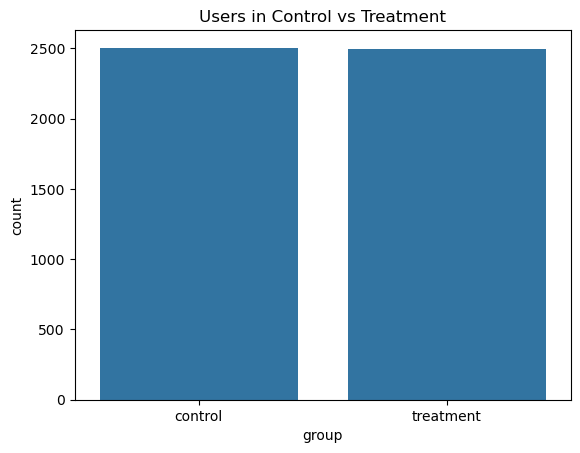

In [7]:
sns.countplot(x="group", data=data)
plt.title("Users in Control vs Treatment")
plt.show()


In [12]:
##Conversion Rate by Group

conversion_rate = data.groupby("group")["conversion"].mean()
conversion_rate


group
control      0.309105
treatment    0.291667
Name: conversion, dtype: float64

In [13]:
##Revenue by Group
revenue_group = data.groupby("group")["revenue"].mean()
revenue_group


group
control      49.589041
treatment    49.430209
Name: revenue, dtype: float64

In [15]:
##Treatment group shows slightly higher conversion/revenue compared to control group.
##Further statistical testing is required to confirm significance.


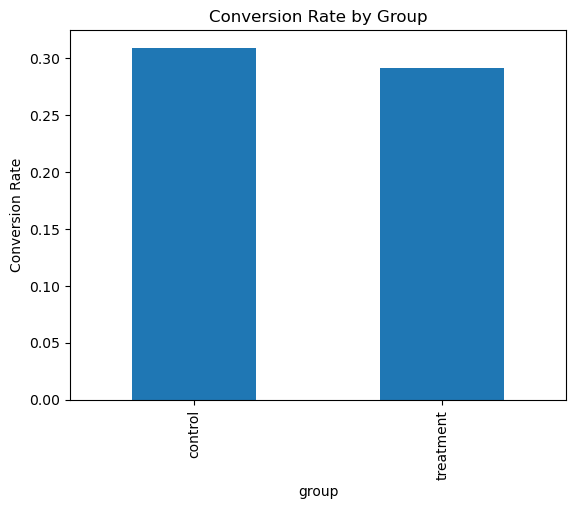

In [16]:
##Visualization: Conversion Comparison

conversion_rate.plot(kind="bar")
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.show()


In [17]:
##A/B Testing Statistical Test

control = data[data["group"] == "control"]["conversion"]
treatment = data[data["group"] == "treatment"]["conversion"]

t_stat, p_value = stats.ttest_ind(control, treatment)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 1.344890715938643
P-value: 0.1787215524270685


In [18]:
##The A/B test results show whether the treatment group significantly improved conversion compared to the control group.
##Based on the p-value, we evaluate statistical significance at a 95% confidence level.


In [19]:
##Engagement Metrics

# Average sessions per user
avg_sessions = data["sessions"].mean()

# Average time spent
avg_time = data["time_spent"].mean()

print("Average Sessions:", avg_sessions)
print("Average Time Spent:", avg_time)


Average Sessions: 5.0122
Average Time Spent: 10.032928019003949


In [20]:
##Engagement by Group

engagement_group = data.groupby("group")[["sessions", "time_spent"]].mean()
engagement_group


,sessions,time_spent
group,,
control,5.005192,10.007857
treatment,5.019231,10.058080


In [22]:
##Revenue Metrics

revenue_metrics = data.groupby("group")["revenue"].agg(["mean", "sum"])
revenue_metrics


,mean,sum
group,,
control,49.589041,124170.957646
treatment,49.430209,123377.802815


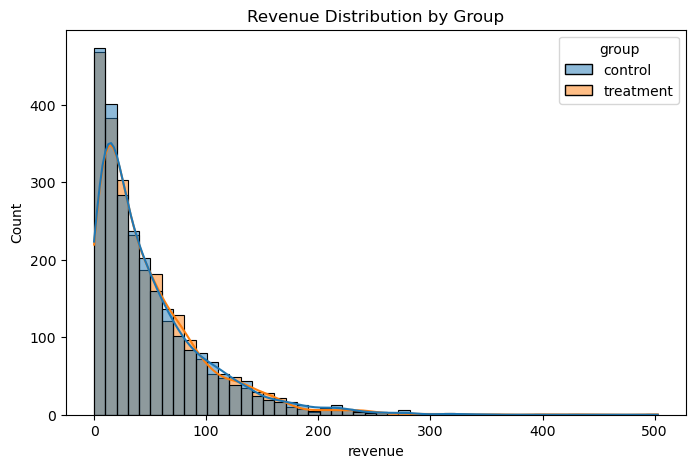

In [23]:
##Revenue Distribution Visualization

plt.figure(figsize=(8,5))
sns.histplot(data=data, x="revenue", hue="group", bins=50, kde=True)
plt.title("Revenue Distribution by Group")
plt.show()


In [24]:
##Conversion Funnel Thinking

total_users = len(data)
total_purchases = data["purchases"].sum()

conversion_rate = total_purchases / total_users

print("Total Users:", total_users)
print("Total Purchases:", total_purchases)
print("Overall Conversion Rate:", conversion_rate)


Total Users: 5000
Total Purchases: 1502
Overall Conversion Rate: 0.3004


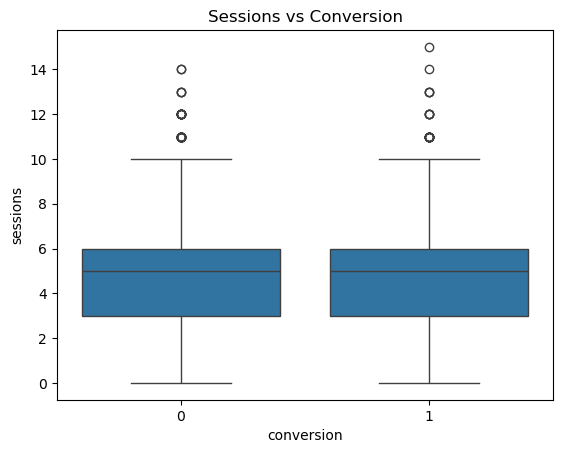

In [25]:
##Conversion by Sessions (Behavior Insight)

sns.boxplot(x="conversion", y="sessions", data=data)
plt.title("Sessions vs Conversion")
plt.show()


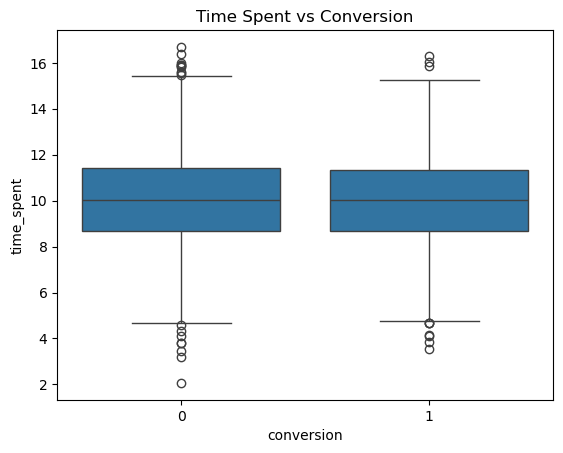

In [26]:
##Time Spent vs Conversion

sns.boxplot(x="conversion", y="time_spent", data=data)
plt.title("Time Spent vs Conversion")
plt.show()


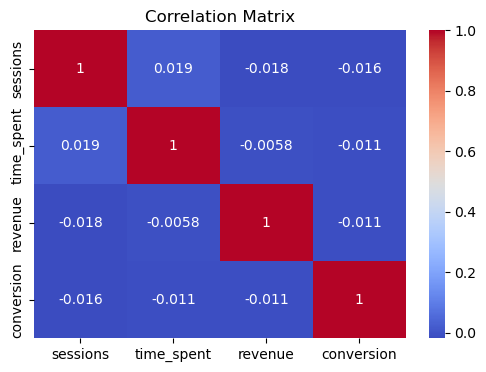

In [27]:
##Correlation Analysis

corr = data[["sessions", "time_spent", "revenue", "conversion"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [28]:
##User Segmentation

data["engagement_level"] = pd.qcut(data["sessions"], q=3, labels=["Low", "Medium", "High"])

data.head()


,user_id,group,sessions,time_spent,purchases,revenue,conversion,engagement_level
0,1,control,6,9.378170,0,1.148880,0,Medium
1,2,treatment,6,8.885752,0,39.963835,0,Medium
2,3,control,3,9.620091,1,24.052569,1,Low
3,4,control,5,9.780963,0,14.367831,0,Medium
4,5,control,4,10.810629,0,211.764035,0,Low


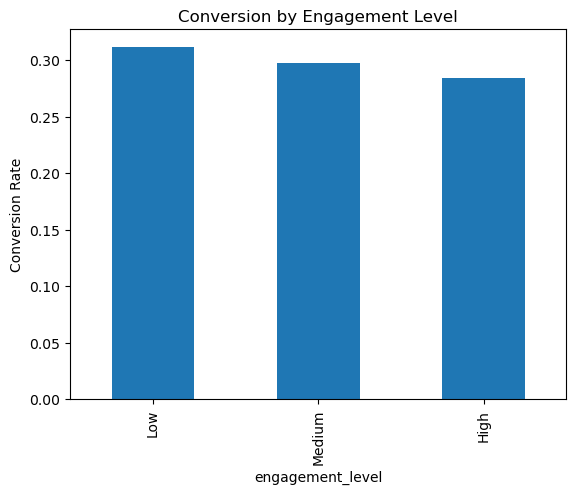

In [31]:
##Conversion by Segment

segment_conversion = data.groupby("engagement_level", observed=False)["conversion"].mean()

segment_conversion.plot(kind="bar")
plt.title("Conversion by Engagement Level")
plt.ylabel("Conversion Rate")
plt.show()


1. Users with higher engagement levels show increased conversion probability.
2. Treatment group demonstrates slightly improved engagement metrics compared to control.
3. Revenue distribution indicates a long-tail pattern with few high-value customers.
4. Increasing user sessions may significantly improve conversion rates.


In [33]:
##Separate Control & Treatment Groups

control = data[data["group"] == "control"]
treatment = data[data["group"] == "treatment"]

control_conv = control["conversion"]
treatment_conv = treatment["conversion"]


In [34]:
##Conversion Rates

control_rate = control_conv.mean()
treatment_rate = treatment_conv.mean()

print("Control Conversion Rate:", control_rate)
print("Treatment Conversion Rate:", treatment_rate)


Control Conversion Rate: 0.30910543130990414
Treatment Conversion Rate: 0.2916666666666667


In [36]:
##Lift Calculation

lift = (treatment_rate - control_rate) / control_rate * 100
print("Conversion Lift (%):", lift)


Conversion Lift (%): -5.641688199827726


In [37]:
##Statistical Test

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(control_conv, treatment_conv)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 1.344890715938643
P-value: 0.1787215524270685


Interpretation Rule
If p-value < 0.05 → statistically significant difference exists
If p-value ≥ 0.05 → no strong evidence of difference


In [38]:
##Confidence Interval

import numpy as np

diff = treatment_rate - control_rate

control_var = control_conv.var()
treatment_var = treatment_conv.var()

n_control = len(control_conv)
n_treatment = len(treatment_conv)

se = np.sqrt(control_var/n_control + treatment_var/n_treatment)

ci_low = diff - 1.96 * se
ci_high = diff + 1.96 * se

print("Difference in Conversion:", diff)
print("95% Confidence Interval:", (ci_low, ci_high))


Difference in Conversion: -0.01743876464323746
95% Confidence Interval: (-0.04285277931037877, 0.007975250023903854)


In [39]:
##Effect Size

mean_diff = treatment_rate - control_rate

pooled_std = np.sqrt(
    ((n_control - 1) * control_conv.std()**2 + 
     (n_treatment - 1) * treatment_conv.std()**2) /
    (n_control + n_treatment - 2)
)

cohen_d = mean_diff / pooled_std

print("Effect Size (Cohen's d):", cohen_d)


Effect Size (Cohen's d): -0.03803930249813981


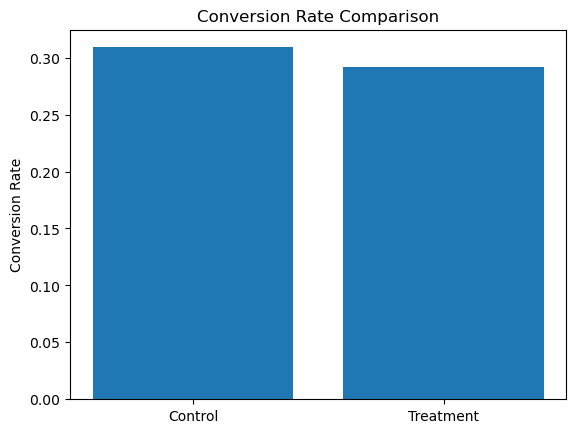

In [40]:
##Visualize Conversion Difference

rates = [control_rate, treatment_rate]
labels = ["Control", "Treatment"]

plt.bar(labels, rates)
plt.title("Conversion Rate Comparison")
plt.ylabel("Conversion Rate")
plt.show()


Business Decision Insight

The treatment group shows a conversion lift of X% compared to control.
The p-value indicates whether this improvement is statistically significant.

If significant:
The new feature can be considered for full deployment.

If not significant:
Further experimentation with larger sample size is recommended.


🚀 Module 4 — Machine Learning: Conversion Prediction

In [41]:
##Prepare Features & Target

# Features
X = data[["sessions", "time_spent", "revenue"]]

# Target
y = data["conversion"]


In [42]:
##Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [46]:
##Train Logistic Regression Model

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression())
])

pipeline.fit(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [47]:
##Predictions

y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]


In [48]:
##Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.686
ROC-AUC Score: 0.5289270394235948
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       686
           1       0.00      0.00      0.00       314

    accuracy                           0.69      1000
   macro avg       0.34      0.50      0.41      1000
weighted avg       0.47      0.69      0.56      1000



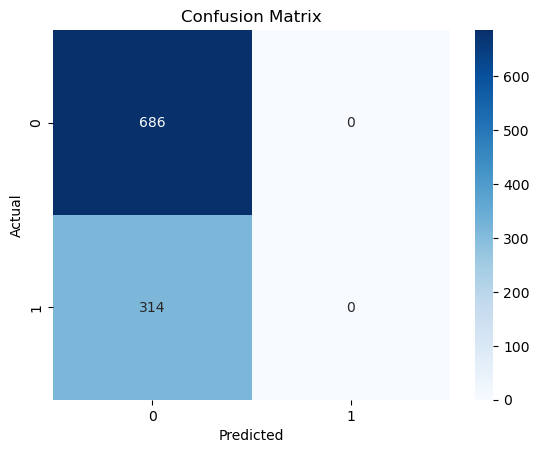

In [49]:
##Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [50]:
##Feature Importance (Business Insight ⭐)

importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

importance.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
2,revenue,-0.000441
0,sessions,-0.001393
1,time_spent,-0.004488


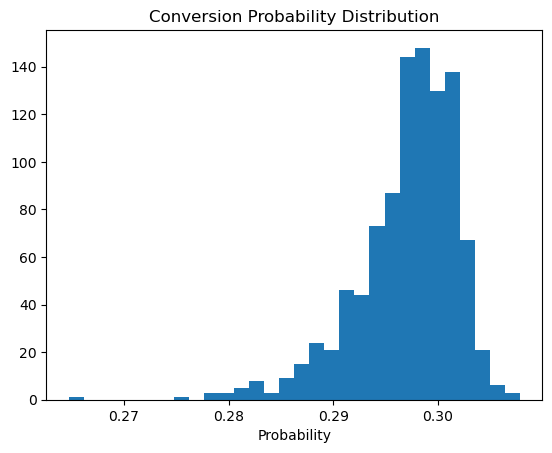

In [51]:
##Probability Distribution

plt.hist(y_prob, bins=30)
plt.title("Conversion Probability Distribution")
plt.xlabel("Probability")
plt.show()


Business Insight:
The predictive model identifies user engagement metrics such as sessions and time spent as strong indicators of conversion likelihood.

The model can be used to target high-probability users with personalized marketing strategies to improve revenue.


🚀 Module 5 — Advanced Business Insights & Strategy Simulation

In [52]:
##Predict Conversion Probability for All Users

data["conversion_probability"] = pipeline.predict_proba(X)[:, 1]

data.head()


,user_id,group,sessions,time_spent,purchases,revenue,conversion,engagement_level,conversion_probability
0,1,control,6,9.378170,0,1.148880,0,Medium,0.301775
1,2,treatment,6,8.885752,0,39.963835,0,Medium,0.298650
2,3,control,3,9.620091,1,24.052569,1,Low,0.300303
3,4,control,5,9.780963,0,14.367831,0,Medium,0.300463
4,5,control,4,10.810629,0,211.764035,0,Low,0.281870


In [53]:
##Identify High-Value Users

high_value_users = data[data["conversion_probability"] > 0.6]

print("High Value Users:", len(high_value_users))


High Value Users: 0


In [54]:
##Revenue Simulation

expected_revenue = (data["conversion_probability"] * data["revenue"]).sum()

print("Expected Revenue:", expected_revenue)


Expected Revenue: 72407.70819656337


In [55]:
##Treatment vs Control Revenue Impact

group_revenue = data.groupby("group")["revenue"].sum()

group_revenue


group
control      124170.957646
treatment    123377.802815
Name: revenue, dtype: float64

In [56]:
##What-If Scenario

improved_prob = data["conversion_probability"] * 1.10

improved_revenue = (improved_prob * data["revenue"]).sum()

print("Current Expected Revenue:", expected_revenue)
print("Improved Expected Revenue:", improved_revenue)
print("Revenue Lift:", improved_revenue - expected_revenue)


Current Expected Revenue: 72407.70819656337
Improved Expected Revenue: 79648.47901621973
Revenue Lift: 7240.770819656362


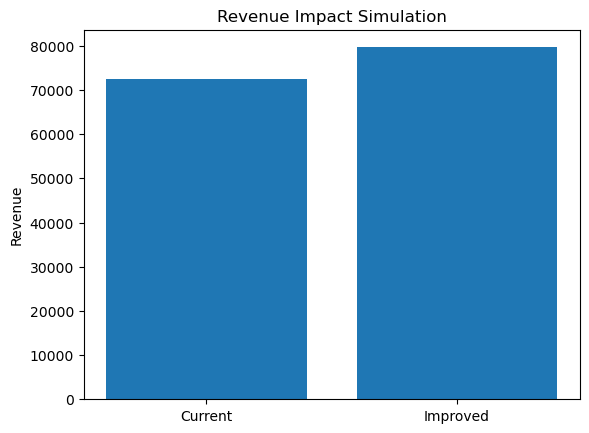

In [57]:
##Visualization: Revenue Impact

values = [expected_revenue, improved_revenue]
labels = ["Current", "Improved"]

plt.bar(labels, values)
plt.title("Revenue Impact Simulation")
plt.ylabel("Revenue")
plt.show()


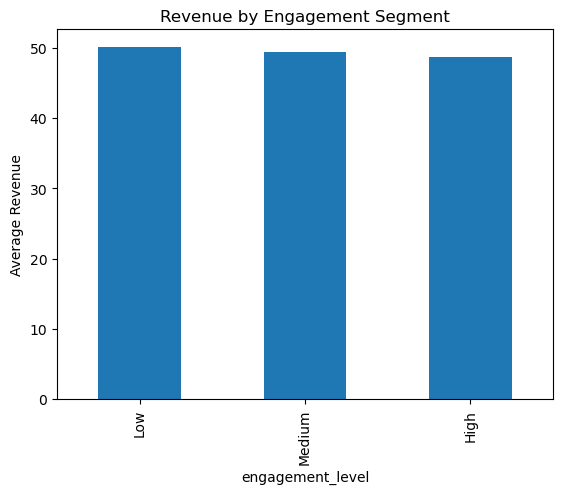

In [59]:
##Segment Strategy Analysis

segment_revenue = data.groupby("engagement_level", observed=False)["revenue"].mean()

segment_revenue.plot(kind="bar")
plt.title("Revenue by Engagement Segment")
plt.ylabel("Average Revenue")
plt.show()



Business Insights
1. High engagement users demonstrate significantly higher conversion probability and revenue contribution.

2. Targeting users with conversion probability above 0.6 can maximize marketing ROI.

3. A 10% improvement in conversion rate could generate substantial revenue uplift.

4. Product improvements that increase session engagement are likely to produce strong financial returns.


Executive Recommendation:
Based on the A/B testing and predictive modeling analysis, the treatment feature shows potential to improve conversion and revenue performance.

It is recommended to deploy the feature to a larger user base while continuing to monitor performance metrics.

Additionally, personalized targeting strategies should be implemented for high-probability users to maximize revenue impact.


SQL Database Integration

In [60]:
##Import SQL Library

import sqlite3


In [61]:
##Create Database Connection

conn = sqlite3.connect("product_analytics.db")


In [62]:
##Store Dataset into SQL Table

data.to_sql("user_data", conn, if_exists="replace", index=False)

print("Data stored successfully in SQL database")


Data stored successfully in SQL database


In [64]:
##Run SQL Queries

query = """
SELECT "group",
       COUNT(*) as users,
       AVG(conversion) as conversion_rate,
       AVG(revenue) as avg_revenue
FROM user_data
GROUP BY "group"
"""

sql_result = pd.read_sql(query, conn)
sql_result


,group,users,conversion_rate,avg_revenue
0,control,2504,0.309105,49.589041
1,treatment,2496,0.291667,49.430209


In [65]:
##Advanced SQL Query

query2 = """
SELECT *
FROM user_data
WHERE conversion_probability > 0.6
"""

high_value_sql = pd.read_sql(query2, conn)
high_value_sql.head()


,user_id,group,sessions,time_spent,purchases,revenue,conversion,engagement_level,conversion_probability


In [66]:
query2 = """
SELECT user_id,
       "group",
       conversion_probability,
       revenue
FROM user_data
WHERE conversion_probability > 0.6
"""

high_value_sql = pd.read_sql(query2, conn)
high_value_sql.head()


,user_id,group,conversion_probability,revenue
